# Natural Language Processing with Deep Learning

## 01 - Word Vectors (Gensim Example)

---

# Gensim Word Vector Visualization of Various Word Vectors

In [ ]:
# In Google Colab, you have to update gensim to a version ~=4
%pip install --upgrade gensim

In [ ]:
import gensim.downloader as api
model = api.load('glove-wiki-gigaword-100')  # this will download and load the model

In [ ]:
model['bread']

In [ ]:
model['croissant']

In [ ]:
model.most_similar('croissant')

In [ ]:
model.most_similar('usa')

In [ ]:
model.most_similar('banana')

In [ ]:
model.most_similar('switzerland')

In [ ]:
model.most_similar(negative='banana')

In [ ]:
word, sim = model.most_similar(positive=['woman', 'king'], negative=['man'])[0]
print(f"{word}: {sim:.4f}")

In [ ]:
def analogy(x1, x2, y1):
    word, _ = model.most_similar(positive=[y1, x2], negative=[x1])[0]
    return word

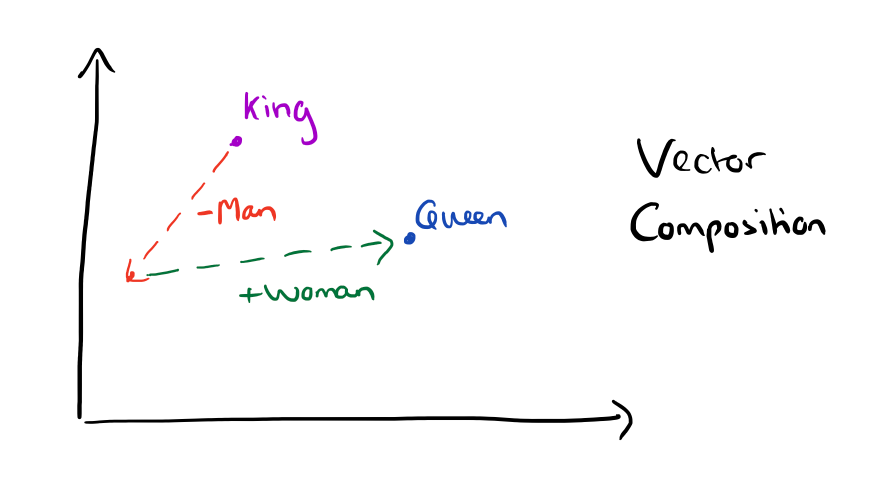

In [ ]:
analogy('japan', 'japanese', 'australia')

In [ ]:
analogy('australia', 'beer', 'france')

In [ ]:
analogy('obama', 'clinton', 'reagan')

In [ ]:
analogy('tall', 'tallest', 'long')

In [ ]:
analogy('good', 'fantastic', 'bad')

In [ ]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

# Plotting the model

With `sklearn` and `PCA`, we can reduce the dimensions from 100 to 2.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.index_to_key), sample)
        else:
            words = [word for word in model.index_to_key]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(12, 12))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.show()

In [ ]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

In [ ]:
display_pca_scatterplot(model, sample=300)